<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Multiple_Linear_Regression_Predicting_Car_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Assignment 2: Predicting Car Fuel Efficiency

####**Problem Statement**
Car manufacturers and buyers are interested in understanding how various car features affect fuel efficiency. This model will predict a car's fuel efficiency (miles_per_gallon) based on horsepower, engine_size, and weight.

####**How the Model Will Help**
The model can help car manufacturers optimize designs for better fuel efficiency, and car buyers can better evaluate vehicles based on their performance characteristics.

####**Data Description**
The dataset contains four columns:
- horsepower: Engine power output in horsepower.
- engine_size: Engine displacement in liters.
- weight: Car weight in pounds.
- miles_per_gallon: Fuel efficiency in miles per gallon.

#### **Instructions**
- Model Training: Split the data into training (80%) and testing (20%) sets, and train a multiple linear regression model using horsepower, engine_size, and weight as predictors for miles_per_gallon.

**Question: Do you think if scaling is necessary for horsepower, engine_size, and weight?**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('/content/multiple_linear_regression_data.csv')

print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Head:
   horsepower  engine_size  weight  miles_per_gallon
0         264          2.3    4032             26.93
1         125          2.4    2674             34.62
2         132          2.0    3105             35.94
3         270          2.3    4150             29.41
4         114          1.5    4197             38.61

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horsepower        100 non-null    int64  
 1   engine_size       100 non-null    float64
 2   weight            100 non-null    int64  
 3   miles_per_gallon  100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None

Descriptive Statistics:
       horsepower  engine_size       weight  miles_per_gallon
count  100.000000   100.000000   100.000000        100.000000
mean   192.480000     2.555000  3576.930000         31.646200
st

In [ ]:
# Step 2: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
horsepower          0
engine_size         0
weight              0
miles_per_gallon    0
dtype: int64


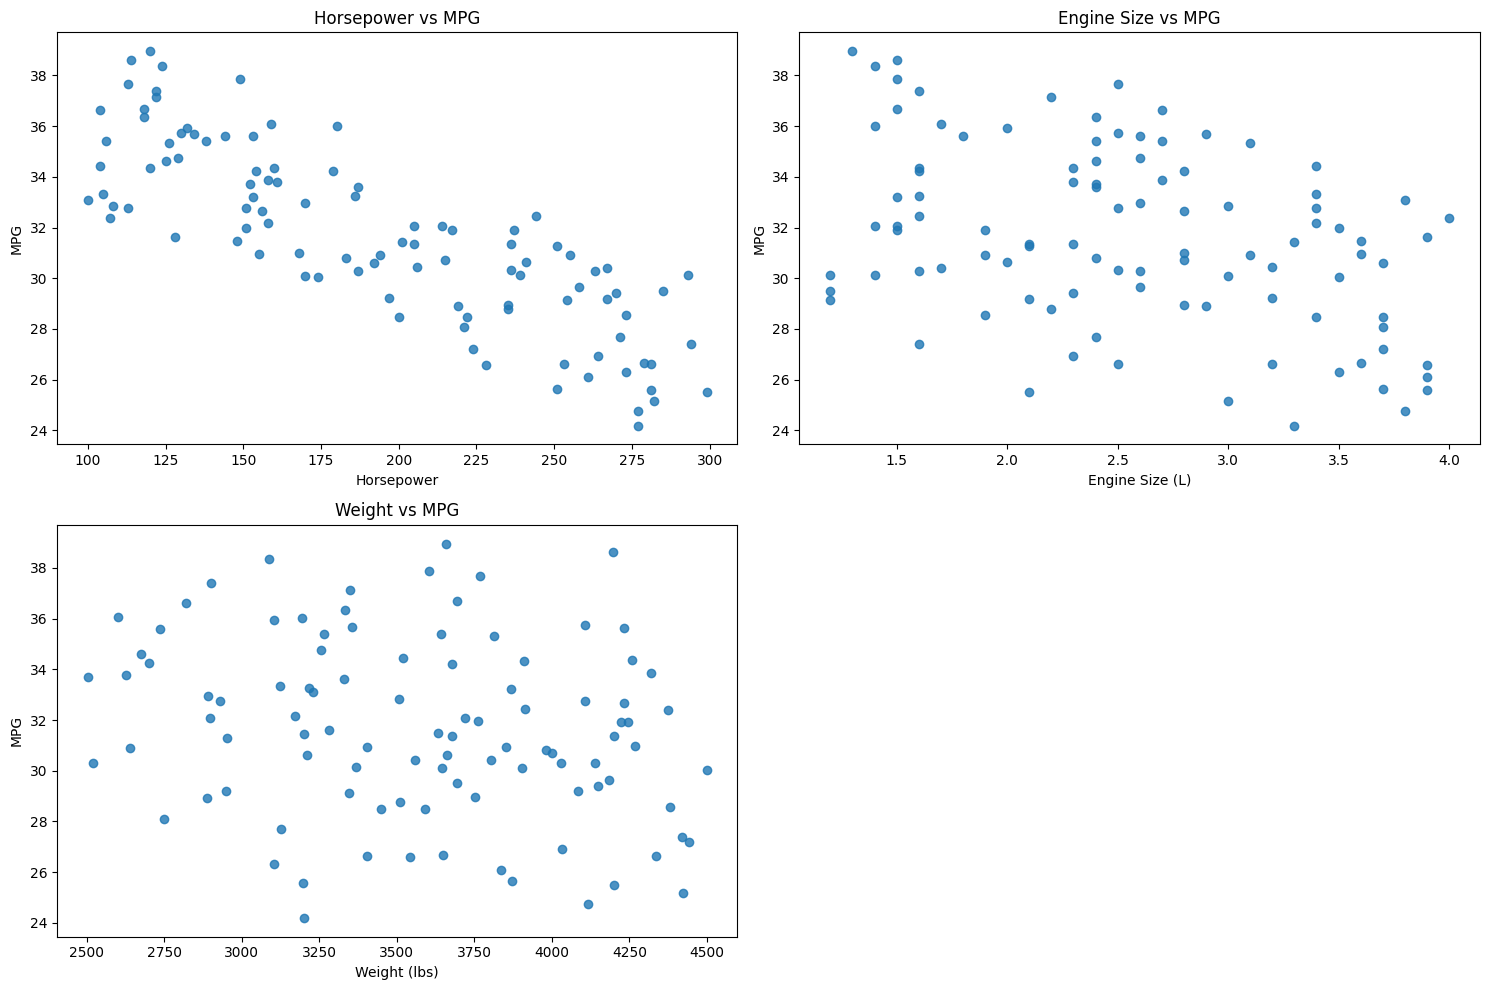

In [ ]:
# Step 3: Visualize relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['horsepower'], df['miles_per_gallon'], alpha=0.8)
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.subplot(2, 2, 2)
plt.scatter(df['engine_size'], df['miles_per_gallon'], alpha=0.8)
plt.title('Engine Size vs MPG')
plt.xlabel('Engine Size (L)')
plt.ylabel('MPG')

plt.subplot(2, 2, 3)
plt.scatter(df['weight'], df['miles_per_gallon'], alpha=0.8)
plt.title('Weight vs MPG')
plt.xlabel('Weight (lbs)')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Prepare data for modeling
X = df[['horsepower', 'engine_size', 'weight']]  # Features
y = df['miles_per_gallon']                      # Target

# Step 5: Check if scaling is needed
print("\nFeature Ranges Before Scaling:")
print("Horsepower range:", (X['horsepower'].min(), X['horsepower'].max()))
print("Engine size range:", (X['engine_size'].min(), X['engine_size'].max()))
print("Weight range:", (X['weight'].min(), X['weight'].max()))

# Decision on scaling (see answer below)
# We'll implement both scaled and unscaled versions for comparison

# Unscaled version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)


Feature Ranges Before Scaling:
Horsepower range: (100, 299)
Engine size range: (1.2, 4.0)
Weight range: (2503, 4499)


In [ ]:
# Scaled version
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
# Step 6: Compare results of scaled and unscaled versions
print("\nUnscaled Model Performance:")
print("Coefficients:", model_unscaled.coef_)
print("Intercept:", model_unscaled.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_unscaled))
print("R-squared:", r2_score(y_test, y_pred_unscaled))

print("\nScaled Model Performance:")
print("Coefficients:", model_scaled.coef_)
print("Intercept:", model_scaled.intercept_)
print("MSE:", mean_squared_error(y_test_scaled, y_pred_scaled))
print("R-squared:", r2_score(y_test_scaled, y_pred_scaled))


Unscaled Model Performance:
Coefficients: [-4.95227155e-02 -2.02693988e+00 -5.50361199e-04]
Intercept: 48.26645005053474
MSE: 1.3066358014310877
R-squared: 0.8881964107948783

Scaled Model Performance:
Coefficients: [-2.92686773 -1.61733418 -0.2894042 ]
Intercept: 31.586882894589447
MSE: 1.3066358014308022
R-squared: 0.8881964107949027


In [ ]:
# Step 7: Feature importance analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Unscaled_Coefficient': model_unscaled.coef_,
    'Scaled_Coefficient': model_scaled.coef_
})
print("\nFeature Coefficients Comparison:")
print(coefficients)


Feature Coefficients Comparison:
       Feature  Unscaled_Coefficient  Scaled_Coefficient
0   horsepower             -0.049523           -2.926868
1  engine_size             -2.026940           -1.617334
2       weight             -0.000550           -0.289404


In [ ]:
# Step 8: Make a sample prediction
sample_car = [[150, 2.5, 3000]]  # horsepower, engine_size, weight
sample_car_scaled = scaler.transform(sample_car)

pred_unscaled = model_unscaled.predict(sample_car)
pred_scaled = model_scaled.predict(sample_car_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Printing Results
print(f"\nSample Prediction for car with 150hp, 2.5L engine, 3000lbs:")
print(f"Unscaled model prediction: {pred_unscaled[0]:.2f} MPG")
print(f"Scaled model prediction: {pred_scaled[0]:.2f} MPG")


Sample Prediction for car with 150hp, 2.5L engine, 3000lbs:
Unscaled model prediction: 34.12 MPG
Scaled model prediction: 34.12 MPG


**Q: Is scaling necessary for horsepower, engine_size, and weight?**

**Answer :** In multiple linear regression, scaling is not strictly necessary because the model can handle features with different scales. The coefficients will automatically adjust to account for the different scales of the features.